# Purpose

In this notebook, multi digit recognition by convolutional neural network is tried.

# Import necessary files

In [1]:
import svhn as svhn
import model as model
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
First, we load the data used for training and testing model

If data is not present on the local machine, it will download data from internet.

SVHN class is designed and implemented as to load all necessary data either from local or internet when it's instance is created.

In [2]:
svhn = svhn.SVHN()

Found and verified
Found and verified
resource/SVHN/train already present - Skipping extraction of resource/SVHN/train.tar.gz.
resource/SVHN/test already present - Skipping extraction of resource/SVHN/test.tar.gz.
training data is already pickled
test data is already pickled
all data is already pickled


# Original Data visualization

Data obtained from [this site](http://ufldl.stanford.edu/housenumbers/) is shown to just check what it looks like.

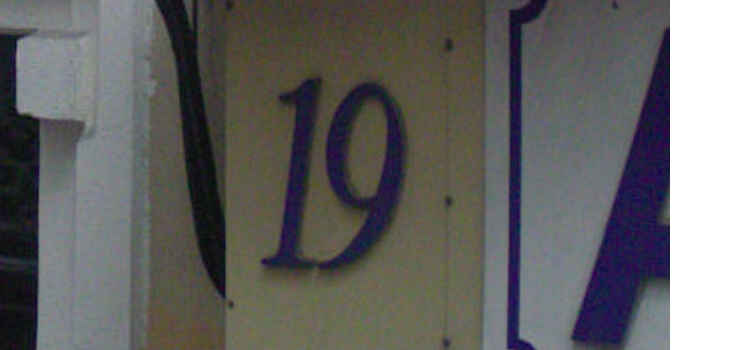

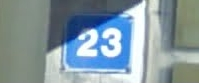

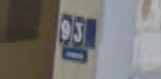

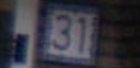

In [3]:
from IPython.display import display, Image

for i in range(5):
    file_name = "resource/SVHN/train/%s.png" % (i+1)
    display(Image(filename=file_name))

# Data expolaration
Key characteristics are analyzed

Number of training data is 33402
Number of test data is 13068
Number of training label type is 1840
Number of training label type is 757
Number of characters in the training dataset


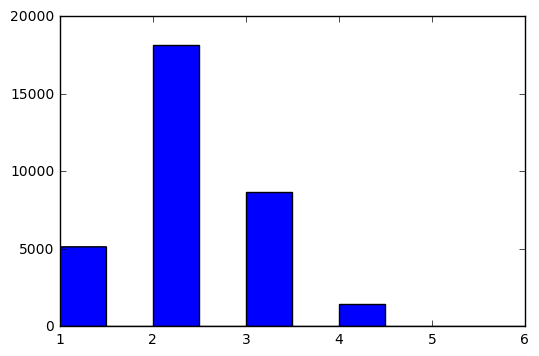

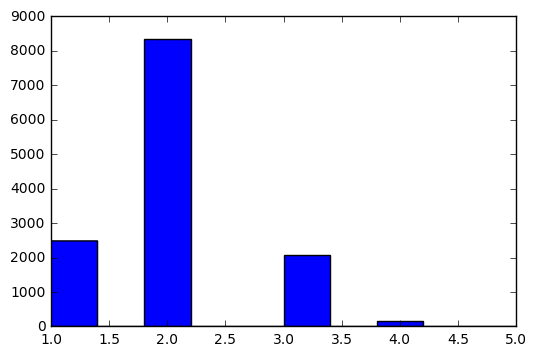

In [11]:
images, labels = svhn.get_reformatted_dataset()
test_images, test_labels = svhn.get_reformatted_test_dataset()
print ("Number of training data is %s" % images.shape[0])
print ("Number of test data is %s" % test_images.shape[0])

training_label_types = svhn.get_label_types()
print ("Number of training label type is %s" % len(training_label_types))

test_label_types = svhn.get_test_label_types()
print ("Number of training label type is %s" % len(test_label_types))

print ("Number of characters in the training dataset")
training_histogram_data  = svhn.get_histogram_data()
training_histogram_data = np.array(training_histogram_data)
plt.hist(training_histogram_data)
plt.show()

test_histogram_data = np.array(test_histogram_data)
plt.hist(test_histogram_data)
plt.show()

# Preprocess
Data is prepocessed as below

- The image is sliced according to the box and those sliced images are used to train the model.
- For models to be trained easily, all pixels in images are scaled such that it means to be 0.
- Image is resized to 32 * 32 pixels

19


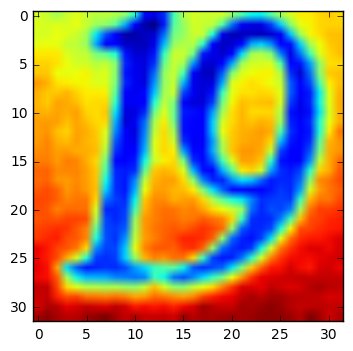

23


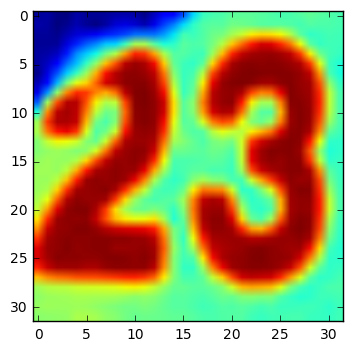

25


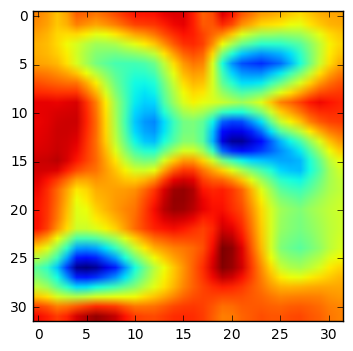

93


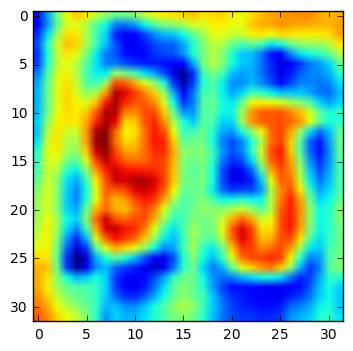

31


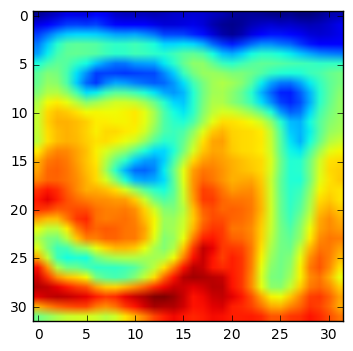

In [5]:
svhn.show_as_image(num=5)

# Training Model
Model is trained

In [6]:
cnnModel = model.CNN()
cnnModel.fit(images, labels)

Step: 0
Minibatch loss at step 0: 64.897247
Training accuracy: 0.0%
Validation accuracy: 0.6%
Step: 500
Minibatch loss at step 500: 7.290961
Training accuracy: 6.2%
Validation accuracy: 2.1%
Step: 1000
Minibatch loss at step 1000: 5.913537
Training accuracy: 6.2%
Validation accuracy: 3.3%
Step: 1500
Minibatch loss at step 1500: 6.650916
Training accuracy: 3.1%
Validation accuracy: 3.3%
Step: 2000
Minibatch loss at step 2000: 5.973312
Training accuracy: 12.5%
Validation accuracy: 3.3%
Step: 2500
Minibatch loss at step 2500: 5.388973
Training accuracy: 3.1%
Validation accuracy: 3.9%
Step: 3000
Minibatch loss at step 3000: 5.276973
Training accuracy: 3.1%
Validation accuracy: 7.5%
Step: 3500
Minibatch loss at step 3500: 6.156951
Training accuracy: 9.4%
Validation accuracy: 7.2%
Step: 4000
Minibatch loss at step 4000: 5.158576
Training accuracy: 18.8%
Validation accuracy: 9.0%
Step: 4500
Minibatch loss at step 4500: 5.060645
Training accuracy: 21.9%
Validation accuracy: 10.1%
Step: 5000
Mi

# Test
The model is tested with unseen data

In [7]:
cnnModel.test(test_images, test_labels)

Accuracy: 65.5%


# Prediction
To actually confirm what the model predict with the image, some data is fed to the model and compare prediction with the images

Predicted number is 5


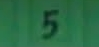

Predicted number is 210


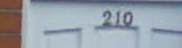

Predicted number is 6


Predicted number is 1


Predicted number is 9


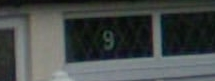

Predicted number is 1


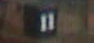

Predicted number is 183


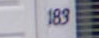

Predicted number is 65


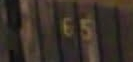

Predicted number is 144


Predicted number is 16


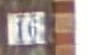

In [6]:
test_image, test_label = np.vsplit(test_images, [10])
predictions = cnnModel.predict(test_image)

for i in range(len(predictions)):
    file_name = "resource/SVHN/test/%s.png" % (i+1)
    print ("Predicted number is %s" % predictions[i])
    display(Image(filename=file_name))